### 530 HW6- Functions 
Emma Rasmussen 

#### Problem 1- Expanding and Interpolating Functions 
##### Parts a & b

In [63]:
import numpy as np
import time

def TaylorSin(x, N):
    sinval = 0
    for i in range(N):
        term = ((-1)**(i+2))*(x**(2*i + 1)) / np.math.factorial(2*i + 1)
        sinval += term

    return sinval

def RMSE(act, pred):
    rmse = np.sqrt(np.mean((np.subtract(act,pred))**2))

    return rmse

def Interp(x,xvals,yvals):
    # np.random.seed(27)
    i = np.searchsorted(xvals,x)
    if i == 0:
        return yvals[0]
    elif i == len(xvals):
        return yvals[-1]
    x0,x1 = xvals[i-1],xvals[i]
    y0,y1 = yvals[i-1],yvals[i]
    interpval = y0 +(y1 - y0)*(x - x0)/(x1 - x0)

    return interpval

def AccSpeed(N):
    #The following line if we want the same random vector every time
    np.random.seed(27)
    xvals = np.random.uniform(0,2*np.pi,10**6)
    xn = np.linspace(0,2*np.pi, 10**6)
    yvals = np.sin(xn)
    apprxvec = []
    actualvec = []
    apprxveci = []
    actualveci = []

    # for part a
    st = time.time()
    for i in range(len(xvals)):
        apprx = TaylorSin(xvals[i], N)
        act = np.sin(xvals[i])
        apprxvec.append(apprx)
        actualvec.append(act)
    et = time.time()
    tt = et - st 

    # for part b
    sti = time.time()
    for i in range(len(xn)):
        apprx = Interp(xvals[i],xn, yvals)
        act = yvals[i]
        apprxveci.append(apprx)
        actualveci.append(act)
    eti = time.time()
    tti = eti - sti 
    rmse = RMSE(apprxvec, actualvec)
    rmsei = RMSE(apprxveci, actualveci)

    #return rmse, tt

    print(f'The rmse for N={N} was: {rmse}')
    print(f'The time it took for N={N} was: {tt}s')

    print(f'The rmse for interpolation for N={N} was: {rmsei}')
    print(f'The time it took for interpolation for N={N} was: {tti}s')

#Testing for different N
AccSpeed(5)
#AccSpeed(7)
#AccSpeed(9)

The rmse for N=5 was: 2.5343073519271746
The time it took for N=5 was: 14.362376928329468s
The rmse for interpolation for N=5 was: 0.9997089327860059
The time it took for interpolation for N=5 was: 9.337021827697754s


#### Problem 2
##### Part a

In [76]:
from scipy.integrate import quad

#For part a, the blackbox python function
def f(x):
    return np.exp(-np.cos(x))

def g(x):
    if -1 <= x <= 1:
        return f(x)
    else: 
        return 0

i1 = 7.9549265210128452745132196653294
i23 = .87070265620795901020832433774759
val1,_ = quad(f, -np.pi, np.pi, limit=100)
val2,_ = quad(f, -1, 1, limit=100)
val3,_ = quad(g, -np.pi, np.pi, limit=100)
print(f'The difference between i1 and the actual value is:{i1-val1}')
print(f'The difference between i2 and the actual value is:{i23-val2}')
print(f'The difference between i3 and the actual value is:{i23-val3}')

The difference between i1 and the actual value is:-8.881784197001252e-16
The difference between i2 and the actual value is:1.1102230246251565e-16
The difference between i3 and the actual value is:-2.5360991084966145e-10


According to python documentation, this function is using a different series of functions for definite vs indefinite integrals. I will only descirbe the definite since that's what we used. It uses a Clenshaw-Curtis method. First, it computes the Chebyshev moments, then, it makes an integer array with the length of whatever you defined the limit as (I did 100). Then, it makes a subinterval for each moment. Then, it makes a rank 2 array with the moments, which it passes on to an integration by using the moments and subdivided array. 

#### Part b

[]

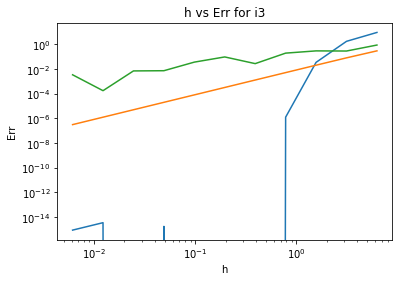

In [77]:
import matplotlib.pyplot as plt

def Trap(func, lower, upper, N):
    b = upper
    a = lower 
    h = (b - a)/N
    val = 0 
    for i in range(N + 1):
        if i == 0 or i ==N:
            val += .5*func(a + i*h)
        else:
            val += func(a + i*h)
    final = h*val

    return final,h

def Plots(Nvec, Errvec, I):
    # plt.figure()
    plt.loglog(Nvec,Errvec)
    plt.title(f'h vs Err for i{I}')
    plt.xlabel('h')
    plt.ylabel('Err')
    return plt.plot()
  
N = [2**i for i in range(11)]

err1vec = []
err2vec = []
err3vec = []
h1vec = []

for j in range(len(N)):
    val1, h1 = Trap(f, -np.pi, np.pi, N[j])
    val2, h2 = Trap(f, -1, 1, N[j])
    val3, h3 = Trap(g, -np.pi, np.pi, N[j])
    err1 = abs(i1 - val1) 
    err1vec.append(err1)
    h1vec.append(h1)
    err2 = abs(i23 - val2)
    err2vec.append(err2)
    err3 = abs(i23 - val3)
    err3vec.append(err3)
 
Plots(h1vec, err1vec, 1)
Plots(h1vec, err2vec, 2)
Plots(h1vec, err3vec, 3)

### Problem 3
#### Part a
The optimal abcissas are the points that are the roots of the highest order legendre polynomials. The weights are chosen so that the integral over the polynomials is exact. In other words, you want the weight to be orthogonal to the function. For this integral, we could calculate them like so: 

In [8]:
from scipy.special import roots_legendre

def OptAW(N):

    absc, weight = roots_legendre(N)

    optabsc = np.pi/2*(1 + absc)
    optweight = np.pi/2*(1 + weight)

    print(f'The optimal abscissas are:{optabsc}')
    print(f'The optimal weights are:{optweight}')

OptAW(5)

The optimal abscissas are:[0.14737235 0.72497071 1.57079633 2.41662194 2.9942203 ]
The optimal weights are:[1.94296021 2.32262448 2.4644049  2.32262448 1.94296021]


#### Part b

In [11]:
def fphi(phi):
    return np.sin(phi)**2

def ftheta(theta):
    return (theta)**2

def Trapphi(N):
    h = 2*np.pi/N
    phivals = np.linspace(0, 2*np.pi, N+1)
    phiint = np.sum(0.5 * h * (fphi(phivals[:-1]) + fphi(phivals[1:])))

    return phiint

def Sphere(Ncos, Nphi):
    rcos, wcos = roots_legendre(Ncos)
    intsum = 0 
    for i in range(Ncos):
        costheta = rcos[i]
        costhetaw = wcos[i]
        intsum += costhetaw*ftheta(costheta)
    intsum *= Trapphi(Nphi)

    return intsum

exact = 2*np.pi/3
ncos = 10
nphi = 100

apprx = Sphere(ncos, nphi)
print(f'The exact value is:{exact}')
print(f'The approximated value is:{apprx}')

The exact value is:2.0943951023931953
The approximated value is:2.0943951023931904


The convergence rate can change with the number of points we are using for theta and phi. If we have more points, the convergence rate will increase because we'll get a more accurate result. 

### Problem 4 

In [61]:
def Sum(n):
    sumval = 0
    exact = np.pi/4
    error = 10**(-7)
    
    for j in range(n):
        val = (-1)**j/(2*j + 1)
        sumval += val
        dif = abs(exact - sumval)
        reldif = abs(dif/exact)
     
        if dif <= error or reldif <= error:
            print(f'The number of terms needed for defined convergence was:{j}')
            return sumval

    return sumval

def AitkenSum(n):
    exact = np.pi/4
    error = 10**(-7)
    for j in range(n - 2):
        Sn = Sum(j)
        Sn1 = Sum(j+1)
        Sn2 = Sum(j+2)
        combo = ((Sn1 - Sn)**2/(Sn2 - 2*Sn1 + Sn))
        if Sn is None or Sn1 is None or Sn2 is None:
            print("Convergence not achieved for Aitken's process.")
            return None
        val = Sn - combo
        dif = abs(exact - val)
        reldif = abs(dif/exact)
     
        if dif <= error or reldif <= error:
            print(f'The number of terms needed for defined convergence for Aitkens process was:{j}')
            return #val

Sum(3000000)
AitkenSum(300000)

The number of terms needed for defined convergence was:2500000
The number of terms needed for defined convergence for Aitkens process was:85


<ipython-input-67-e025e7a14d12>:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(func, lower, upper)


i1_exact: 7.954926521012846, i1_approx: 7.954926521012847
i2_exact: 0.8707026562079591, i2_approx: 0.870702656207959
i3_exact: 0.8707026562079591, i3_approx: 0.8707026223557608


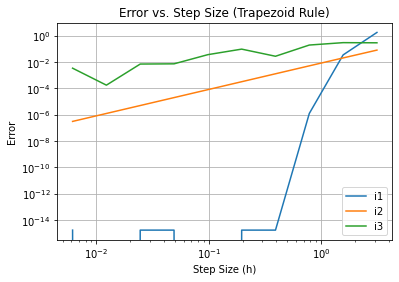

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the functions
def f(x):
    return np.exp(-np.cos(x))

def g(x):
    return np.where(np.logical_and(x >= -1, x <= 1), f(x), 0)

# Define the exact integrals
i1_exact = 7.9549265210128452745132196653294
i23_exact = 0.87070265620795901020832433774759

# Function to compute integrals using black-box integration routine
def compute_integral(func, lower, upper):
    integral, _ = quad(func, lower, upper)
    return integral

# Compute integrals using black-box integration routine
i1_approx = compute_integral(f, -np.pi, np.pi)
i2_approx = compute_integral(f, -1, 1)
i3_approx = compute_integral(g, -np.pi, np.pi)

# Print the results
print(f"i1_exact: {i1_exact}, i1_approx: {i1_approx}")
print(f"i2_exact: {i23_exact}, i2_approx: {i2_approx}")
print(f"i3_exact: {i23_exact}, i3_approx: {i3_approx}")

import numpy as np

# Function to compute integral using the trapezoid rule
def trapezoid_rule(func, lower, upper, N):
    h = (upper - lower) / N  # Width of each subinterval
    x = np.linspace(lower, upper, N+1)  # Points at which to evaluate the function
    y = func(x)  # Function values at the points
    
    # Compute the integral using the trapezoid rule formula
    integral = h * (np.sum(y) - 0.5 * (y[0] + y[-1]))
    
    return integral, h

# Compute integrals using the trapezoid rule for different numbers of points (N)
N_values = [2**i for i in range(1, 11)]  # N = 2, 4, 8, ..., 1024

# Lists to store errors and step sizes
errors_i1 = []
errors_i2 = []
errors_i3 = []
h_values = []

# Compute errors for each integral and store the results
for N in N_values:
    # Compute integrals using the trapezoid rule
    i1_approx, h1 = trapezoid_rule(f, -np.pi, np.pi, N)
    i2_approx, h2 = trapezoid_rule(f, -1, 1, N)
    i3_approx, h3 = trapezoid_rule(g, -np.pi, np.pi, N)
    
    # Calculate errors
    error_i1 = np.abs(i1_exact - i1_approx)
    error_i2 = np.abs(i23_exact - i2_approx)
    error_i3 = np.abs(i23_exact - i3_approx)
    
    # Store errors and step sizes
    errors_i1.append(error_i1)
    errors_i2.append(error_i2)
    errors_i3.append(error_i3)
    h_values.append(h1)  # Assuming h is the same for all integrals

# Plot errors versus step sizes on a log-log scale
plt.figure()
plt.loglog(h_values, errors_i1, label='i1')
plt.loglog(h_values, errors_i2, label='i2')
plt.loglog(h_values, errors_i3, label='i3')
plt.title('Error vs. Step Size (Trapezoid Rule)')
plt.xlabel('Step Size (h)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
def Trap(func, lower, upper, N):
    b = upper
    a = lower 
    h = (b - a)/N
    val = 0 
    for i in range(N + 1):
        if i == 0 or i ==N:
            val += .5*func(a + i*h)
        else:
            val += func(a + i*h)
    final = h*val

    return final,h

def trapezoid_rule(func, lower, upper, N):
    h = (upper - lower) / N  # Width of each subinterval
    x = np.linspace(lower, upper, N+1)  # Points at which to evaluate the function
    y = func(x)  # Function values at the points
    
    # Compute the integral using the trapezoid rule formula
    integral = h * (np.sum(y) - 0.5 * (y[0] + y[-1]))
    
    return integral, h

print(trapezoid_rule(f, -np.pi, np.pi, N))
print(Trap(f, -np.pi, np.pi, N))


(7.954926521012844, 0.006135923151542565)
(7.954926521012847, 0.006135923151542565)
